# scLENS with cupy & dask

In [1]:
from scLENS2 import scLENS2
import pandas as pd
import cupy
import scanpy as sc

/home/khyeonmin/micromamba/envs/scLENS/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# adata = sc.read_h5ad('/home/khyeonmin/projects/ibs/scLENS-py-test/mouse_brain-cell2location.h5ad')
# adata

df = pd.read_csv('/home/khyeonmin/projects/ibs/scLENS-py-test/16-plex_GEM-X_Flex_1M_human_K562_CRISPR_aggregate_count_filtered_feature_bc_matrix.h5')
df

,cell,ENSG00000237683,Unknown,LINC01409,LINC00115,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,...,MT-ND6,MT-CYB,ENSG00000215750,ENSG00000215781,ENSG00000220023,ENSG00000212884,ENSG00000215615,ENSG00000215764,ENSG00000215700,ENSG00000215699
0,b.cells,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3990,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3991,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3992,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# run if you use csv file

obs = pd.DataFrame(df['cell']) 

X = df.iloc[:, 1:].values 

var = pd.DataFrame(df.columns[1:])
var.columns = ['gene'] 

adata = sc.AnnData(X, obs=obs, var=var)

adata

/home/khyeonmin/micromamba/envs/scLENS/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/khyeonmin/micromamba/envs/scLENS/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 3994 × 15716
    obs: 'cell'
    var: 'gene'

In [4]:
sclens = scLENS2.scLENS2()

adata -> sparse
is not sparse
sparse -> array
Removed 0 cells and 6065 genes in QC


/home/khyeonmin/projects/scLENS/scLENS2/scLENS2.py:152: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  data.uns['preprocess_mean_plot'] = fig1


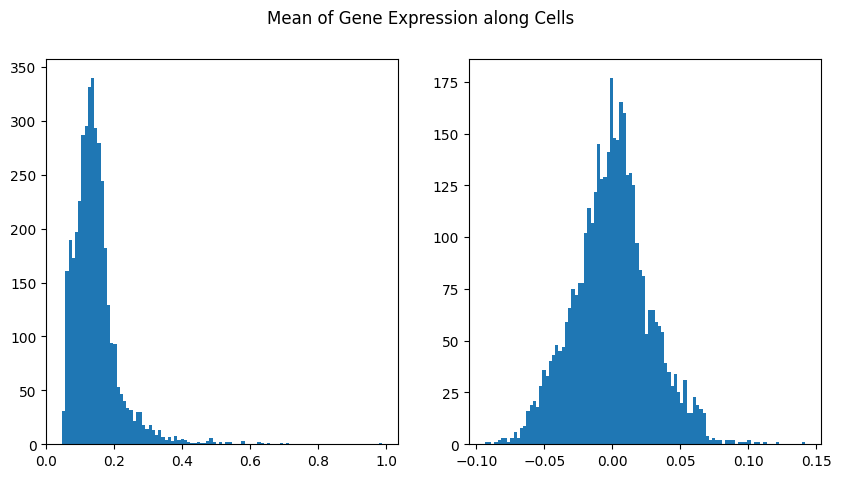

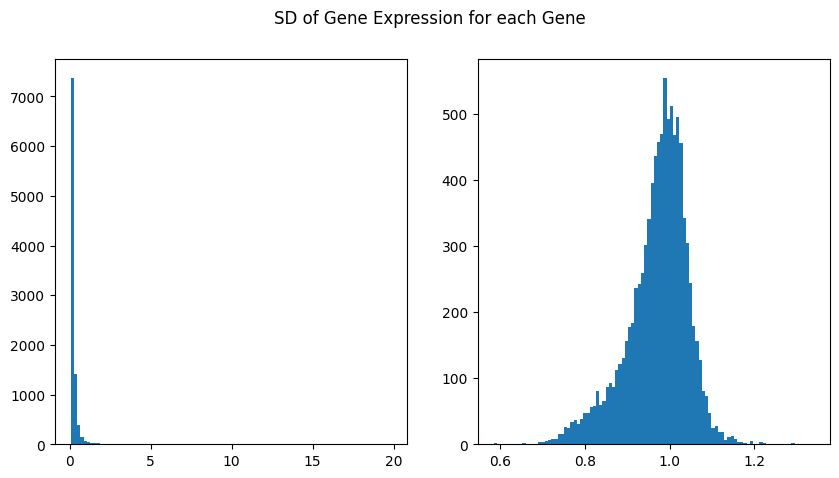

In [5]:
_, adata = sclens.preprocess(adata, plot = True)

In [6]:
adata

AnnData object with n_obs × n_vars = 3994 × 9651
    obs: 'cell'
    var: 'gene'
    uns: 'preprocess_mean_plot', 'preprocess_sd_plot'

gene is more than cell
gene is more than cell
Max interactions exceeded!
Number of signal components: 16
L_mp type: <class 'cupy.ndarray'>
L_mp shape: (3975,)


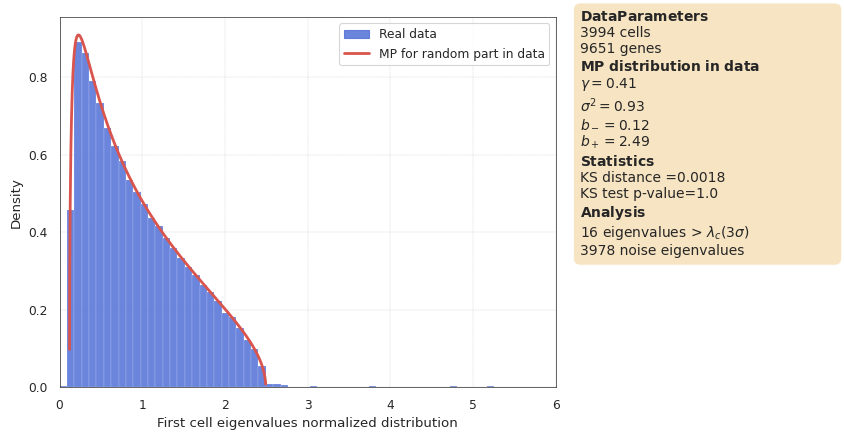

sparsity_th: 0.06003157968490682
Min(corr): 0.09382222489279181, sparsity: 0.999, add_ilen: (38546,)
Min(corr): 0.0764215114314727, sparsity: 0.998, add_ilen: (77092,)
Min(corr): 0.06831123162581815, sparsity: 0.997, add_ilen: (115638,)
Min(corr): 0.0646812549712145, sparsity: 0.996, add_ilen: (154184,)
Min(corr): 0.06379305714999887, sparsity: 0.995, add_ilen: (192730,)
Min(corr): 0.06109308222637256, sparsity: 0.994, add_ilen: (231276,)
Min(corr): 0.05889324682470223, sparsity: 0.993, add_ilen: (269822,)
Min(corr): 0.05906667647212973, sparsity: 0.992, add_ilen: (308368,)
Min(corr): 0.057446585693095374, sparsity: 0.991, add_ilen: (346914,)
Min(corr): 0.056318685186975234, sparsity: 0.99, add_ilen: (385460,)
Min(corr): 0.055748917500561525, sparsity: 0.989, add_ilen: (424007,)


100%|██████████| 20/20 [02:20<00:00,  7.03s/it]


In [7]:
X_transform = sclens.fit_transform(plot_mp=True)

In [8]:
X_transform.shape

(3994, 10)

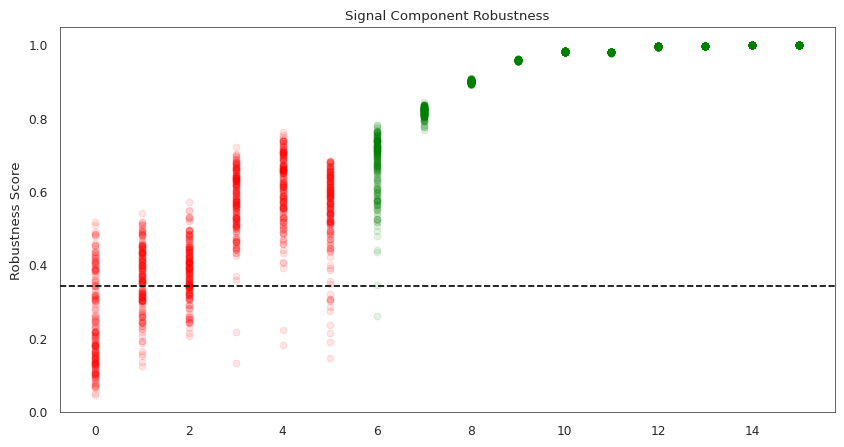

In [9]:
sclens.plot_robust_score()

In [10]:
adata

AnnData object with n_obs × n_vars = 3994 × 9651
    obs: 'cell'
    var: 'gene'
    uns: 'preprocess_mean_plot', 'preprocess_sd_plot', 'robust_score_plot'
    obsm: 'PCA_scLENS'

In [11]:
adata.obsm['PCA_scLENS']

array([[ 0.04105718, -0.03826169, -0.02644869, ..., -0.14582109,
         0.06994112, -0.02711196],
       [ 0.02534541, -0.00069116, -0.02015234, ..., -0.13098915,
         0.07156501, -0.03700359],
       [ 0.00774764,  0.00759813, -0.02913346, ..., -0.13624159,
         0.05192215, -0.0357052 ],
       ...,
       [-0.00412252,  0.00800009,  0.00269003, ...,  0.02358551,
        -0.06861508,  0.0384025 ],
       [ 0.02841542, -0.01079739,  0.00910996, ...,  0.02328334,
        -0.00856293, -0.05428069],
       [ 0.01457923,  0.03640545,  0.01290544, ...,  0.03067032,
        -0.01833608, -0.08521219]])

# scanpy와 호환성

In [12]:
adata.obsm['PCA_scLENS'] = adata.obsm['PCA_scLENS'].get()
sc.pp.neighbors(adata, use_rep='PCA_scLENS')

In [13]:
adata

AnnData object with n_obs × n_vars = 3994 × 9651
    obs: 'cell'
    var: 'gene'
    uns: 'preprocess_mean_plot', 'preprocess_sd_plot', 'robust_score_plot', 'neighbors'
    obsm: 'PCA_scLENS'
    obsp: 'distances', 'connectivities'

In [14]:
sc.tl.umap(adata)

/tmp/ipykernel_1529856/2406609555.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=1.0)


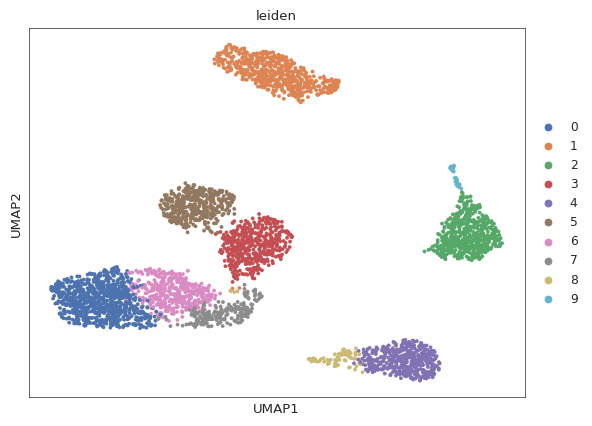

In [15]:
sc.tl.leiden(adata, resolution=1.0)
sc.pl.umap(adata, color='leiden')